In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import gridspec
import warnings


In [2]:
card=pd.read_csv('creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(card.shape)

(284807, 31)


In [4]:
print(card.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

C:\Users\Trashi Singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

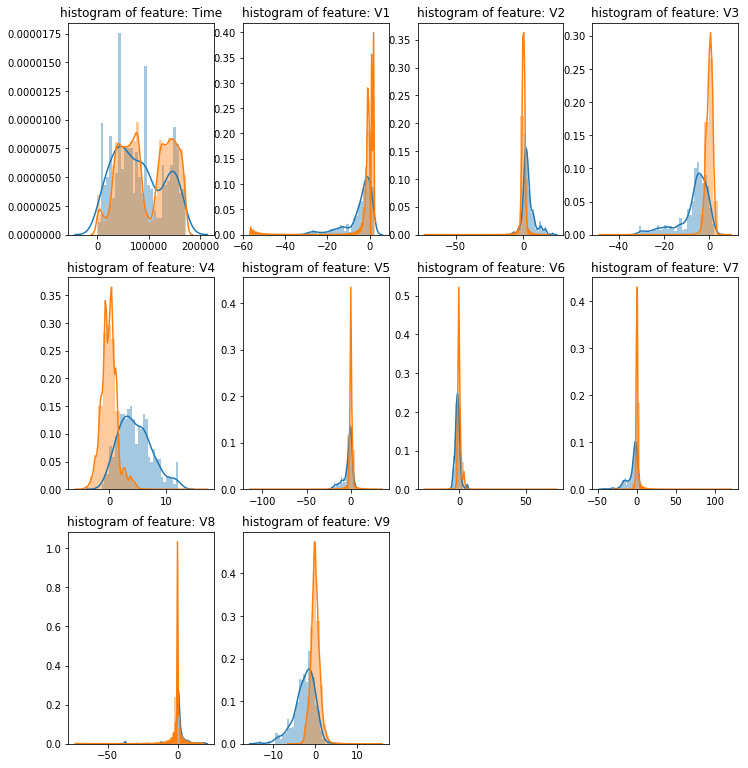

In [5]:
from matplotlib import gridspec
# distribution of anomalous features
features = card.iloc[:,0:10].columns

plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
#gs = gridspec.GridSpec(30, 1)
for i, c in enumerate(card[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(card[c][card.Class == 1], bins=30)
 sns.distplot(card[c][card.Class == 0], bins=30)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

Class as pie chart:


Text(0, 0.5, '')

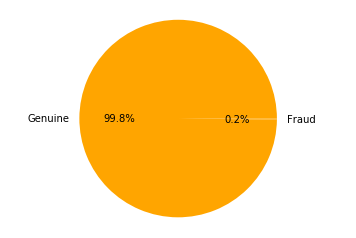

In [6]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(card.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['orange'])
plt.axis('equal')
plt.ylabel('')

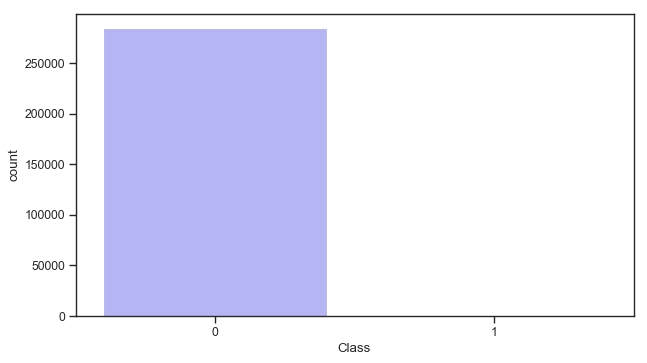

In [7]:
figure = plt.figure(figsize = (9, 5),dpi=80, facecolor='w', edgecolor='k')


sns.set(style="ticks")
f = sns.countplot(x="Class", data=card, palette="bwr")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y = card['Class'].values
x = card.drop(['Class'],axis=1).values
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 42)


In [10]:
from sklearn.naive_bayes import GaussianNB


In [11]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)


In [12]:
clf.score(x_test, y_test)

0.9930128857835048

In [13]:
prc= precision_score(y_train, y_pred, average='binary')
recall= recall_score(y_train, y_pred, average='binary')

In [14]:
print(prc)
print(recall)

0.16219588271990018
0.6598984771573604


In [15]:
f_src= f1_score(y_train, y_pred, average='binary')
print(f_src)

0.2603905858788182


In [16]:
acc = accuracy_score(y_train, y_pred )
print(acc)

0.9935175228773947


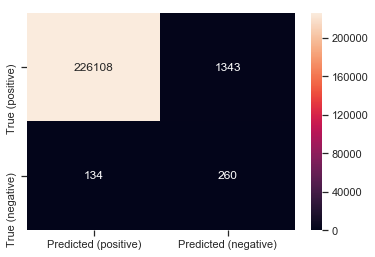

In [17]:
conf = confusion_matrix(y_train, y_pred)

card_conf = pd.DataFrame(conf, index = ['True (positive)', 'True (negative)'])
card_conf.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(card_conf, annot=True, fmt="d")


In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_train)


C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
from IPython.display import Image
from sklearn.tree import export_graphviz


In [20]:
clf.score(x_test, y_test)

0.9995259997893332

In [21]:
prc = precision_score(y_train, y_pred, average='binary')
recall = recall_score(y_train, y_pred, average='binary')

print(prc)
print(recall)

0.9973404255319149
0.9517766497461929


In [22]:
f_src= f1_score(y_train, y_pred, average='binary')
print(f_src)

0.974025974025974


In [23]:
acc = accuracy_score(y_train, y_pred )
print(acc)

0.9999122210274529


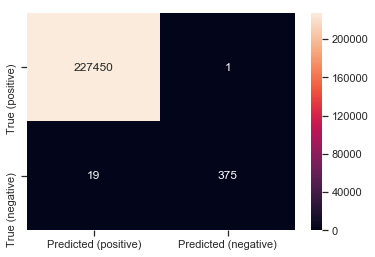

In [24]:

conf = confusion_matrix(y_train, y_pred)

card_conf = pd.DataFrame(conf, index = ['True (positive)', 'True (negative)'])
card_conf.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(card_conf, annot=True, fmt="d")


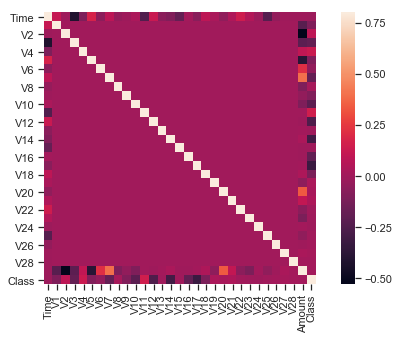

In [25]:
# Correlation matrix
corrmat = card.corr()
fig = plt.figure(figsize = (9, 5))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

## Hyperparameter tuning 

In [26]:
features = np.array(card.columns[:-1])
y = card['Class'].values
X = card.drop(['Class'],axis=1).values
X_train,X_test,y_train,y_test = train_test_split(X, y,  test_size=0.33, random_state = 42)

#### Hypterparameters to tune base models using RandomizedSearchedCV


In [27]:
params_rf = { 
    'n_estimators': [5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 8, 15, 25, 30, None],
    'min_samples_leaf' : [0.1, 2, 5, 10],
    'min_samples_split': [0.1, 2, 5, 10, 15, 60],
    'random_state': [42]
 }
params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.08, 0.09, 0.1, 0.11, 0.12],
    'random_state': [78]
}


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

In [29]:
# function to display scores for classifier clf, with training data x_tr, y_tr and test data
# x_te, y_te
def scores(clf, x_tr, y_tr, x_te, y_te):
    clf.fit(x_tr, y_tr)
    pred = clf.predict(x_te)
    print('Precision:',precision_score(y_te, pred))
    print('Recall:',recall_score(y_te, pred))
    print('F1:',f1_score(y_te, pred))
    print('Confusion Matrix (tn, fp, fn, tp):',confusion_matrix(y_te, pred).ravel())

In [30]:
def get_metafeatures(clf, x, y, kf):
    meta_feat = np.zeros((len(x),))
    for train_index, test_index in kf.split(x, y):
        X_tr, X_te = x[train_index], x[test_index]
        y_tr, y_te = y[train_index], y[test_index]
        clf.fit(X_tr, y_tr)
        y_pred = clf.predict(X_te)
        meta_feat[test_index] = y_pred
    return meta_feat.reshape(-1, 1)

In [31]:
clf_rf = RandomForestClassifier(n_estimators=300).fit(X_train,y_train)
predictionforest = clf_rf.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[93830     8]
 [   28   121]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.94      0.81      0.87       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.97      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987



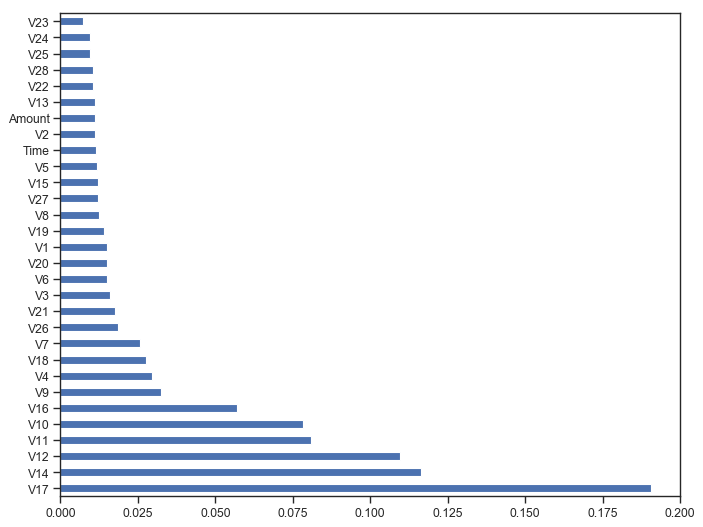

In [32]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf_rf.feature_importances_, index=card.drop(card[['Class']], 
                                                                       axis=1).columns)
feat_importances.nlargest(30).plot(kind='barh')

In [33]:
card[['V17', 'V9', 'V6', 'V12','Class']].head()

,V17,V9,V6,V12,Class
0,0.207971,0.363787,0.462388,-0.617801,0
1,-0.114805,-0.255425,-0.082361,1.065235,0
2,1.109969,-1.514654,1.800499,0.066084,0
3,-0.684093,-1.387024,1.247203,0.178228,0
4,-0.237033,0.817739,0.095921,0.538196,0


In [34]:
X = card[['V17', 'V9', 'V6', 'V12']]
Y = card['Class']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_est = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [35]:
clf_rf = RandomForestClassifier(random_state= 42).fit(X_train,y_train)
predictionforest = clf_rf.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc1 = accuracy_score(y_test,predictionforest)

C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[93823    15]
 [   35   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.88      0.77      0.82       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.94      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987



<h3>Manual Search

In [36]:
clf_rf = RandomForestClassifier(n_estimators=10, random_state= 42).fit(X_train,y_train)
predictionforest = clf_rf.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc2 = accuracy_score(y_test,predictionforest)

[[93823    15]
 [   35   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.88      0.77      0.82       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.94      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987



### RandomForestClassifier Hyperparameter tuning using RandomizedSearchCV with 5-fold

In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn import utils

In [38]:
#simple randomsearch data visualisation
random_search = {
               'max_features': ['auto', 'sqrt','log2', None],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

print(random_search)

{'max_features': ['auto', 'sqrt', 'log2', None], 'n_estimators': [151, 267, 384, 500, 617, 733, 850, 966, 1083, 1200]}


In [39]:
clf_rf = RandomForestClassifier()
rand_rf = RandomizedSearchCV(clf_rf, params_rf, scoring = 'f1', cv=kf) 
rand_rf.fit(X_train, y_train)

C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Trashi Singh\Anaconda3\lib\site-packages\sklearn\metric

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
          error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [5], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 15, 25, 30, None], 'min_samples_leaf': [0.1, 2, 5, 10], 'min_samples_split': [0.1, 2, 5, 10, 15, 60], 'random_state': [42]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [ ]:
clf_rf = RandomForestClassifier()
rand_rf = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
rand_rf.fit(X_train,y_train)

In [ ]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', columns='param_max_features')
     
sns.heatmap(table)

In [ ]:
print('RandomForest Best estimator:')
print(rand_rf.best_estimator_)
print('RandomForest Best score:')
print(rand_rf.best_score_)

In [ ]:
# best RF classifier after hyperparameter tuning based on F1 score
b_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False) 
pred_train_rf = get_metafeatures(b_rf, X_train, y_train, kf) 
pred_test_rf = get_metafeatures(b_rf, X_test, y_test, kf)
scores(b_rf, X_train, y_train, X_test, y_test)

### Logistic Regression Hyperparameter tuning using RandomizedSearchCV with 5-fold


In [ ]:
clf_lr = LogisticRegression()

In [ ]:
rand_lr = RandomizedSearchCV(clf_lr, params_lr, scoring = 'f1', cv=kf)

In [ ]:
rand_lr.fit(X_train, y_train)

In [ ]:
print('LR Best estimator:')
print(rand_lr.best_estimator_)
print('LR Best score:')
print(rand_lr.best_score_ )

In [ ]:
# best LR classifier after hyperparameter tuning based on F1 score
b_lr = LogisticRegression(C=0.11, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=78, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
pred_train_lr = get_metafeatures(b_lr, X_train, y_train, kf)
pred_test_lr = get_metafeatures(b_lr, X_test, y_test, kf)
scores(b_lr, X_train, y_train, X_test, y_test)